In [2]:
using Plots
using SparseArrays
using LinearAlgebra

In [3]:
function source_function(x) #To change for the next day but it works 
    #=X0 = 20.0
    σ = 0.8
    A = 10.
    return  A .* exp.(.-((x .- X0).^2)./σ^2)  =#
    return 10. .+( x .* 0.)
end

source_function (generic function with 1 method)

In [4]:
function source(N)   
#Parameter
    l = 80.
    dx = l/N
    
#Mesh
    X_vect = Vector(0:dx:l)
    
# Function source
    f = source_function(X_vect)
    return f
    
end

source (generic function with 1 method)

In [5]:
function exact_function(x)
    l= 80 #length
    σ = 10 #contrainte Gpa
    E = 128 #contrainte GPA
    ϵ = σ/E #hooke 
    A = 10.
    return  (A ./ (24 .*ϵ)).* x.^2 .* (x.-l).^2 #exact solution for a source function constant (example : f = 10)
end


exact_function (generic function with 1 method)

In [6]:
function exact_solution(N)

#Parameter
    l = 80.
    dx = l/N
#Mesh
    X_vect = Vector(0:dx:l)
# Function source
    f = exact_function(X_vect)
    return f
end

exact_solution (generic function with 1 method)

In [7]:
function matrix(n)
#Parameter
    l = 80.#length 
    σ = 10 #contrainte GPa
    E = 128 #cYoung module 
    ϵ = σ/E #Hooke 
    dx = l/n
    α = ϵ / dx^4
    

# Build the matrix
    A = spdiagm( -1 => -4 *α* ones(n-1), -2 =>  α* ones(n-2), 0 =>  6  *α* ones(n)   , 1 => - 4 *α* ones(n-1), 2 =>   α*ones(n-2) )

# Coefficient that change in the  matrix (TRIED SOMETHING THAT WORK BETTER)
    A[1,2] = 0
    A[1,1]= 1
    A[1,3] = 0
    #A[2,1] = 0
    #A[2,2] = 1
    #A[2,3] = 0
    #A[2,4] = 0
    #A[n-1, n-3] = 0
    #A[n-1,n-2] = 0
    #A[n-1,n-1] = 1
    #A[n-1,n] = 0
    A[n,n-2] = 0
    A[n,n-1] = 0
    A[n,n]= 1

#time 135.690 microseconds and 65 allocations for n= 2000
    return A
end

matrix (generic function with 1 method)

In [8]:
function biharmonic(N)
    #Parameter of the beam
        l= 80 #length
        dx = l/ N  

    # Build of the matrix A
        A = matrix(N+1)

    # Vector B from Au = B (Boundary)
        b = zeros(N+1)
        b[1] = 0 #encastrement 
        #b[2] = 0     Not sure about this
        #b[end-1] = 0 Not sure about this 
        b[end] = 0 #encastrement

    # Vector S for the source power
        X_vect = Vector(0:dx:l)
        S = source_function(X_vect) 
        S[1] = 0                       #Not sure about this 
        S[end] = 0                     #Not sure about this

    # Solving of the Linear System
        u = A \ (b+S) 
        return u
end

biharmonic (generic function with 1 method)

In [9]:
function curves(N)
    l = 80.0
    dx = l/ N 
    exact = exact_solution(N)
    modele = biharmonic(N)
    title = "Biharmonic modelisation for $N points"
    title_2 = "plot_biharmonic_$N.png"
    X = Vector(0:dx:l)
    plot(X, exact, label = "exact_solution", xlabel = "Lenght of the beam", ylabel = "Déplacement", title = title)
    plot!(X, modele, label = "modele")
    #savefig(title_2)
end 

curves (generic function with 1 method)

In [10]:
function error_relative(N)
    exact = exact_solution(N)
    modele = biharmonic(N)
    l = 80.
    dx = l / N
    X = Vector(0:dx:l)
    error = (abs.(exact .- modele) ./ exact) * 100
    title = "Percenatge of the relative error for $N points"
    title_2 = "plot_biharmonic_error_$N.png"
    plot(X, error, label = "Percentage of the relative error", xlabel = "Length of the beam", ylabel = "Error", title = title)
    #savefig(title_2)
end

error_relative (generic function with 1 method)

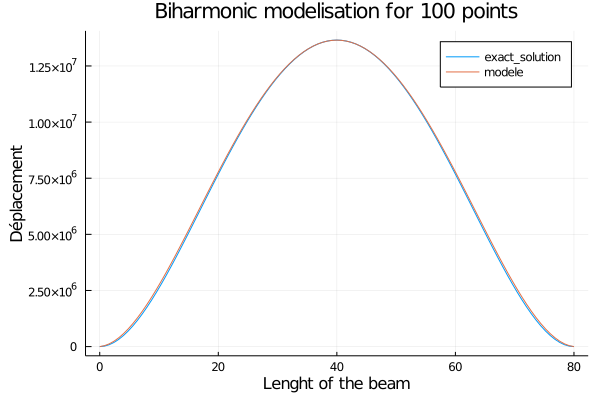

In [11]:
curves(100)